# Gridding 

In [1]:
%matplotlib inline

import sys, os
sys.path.append(os.path.join('..','..'))

from matplotlib import pylab

import numpy

from matplotlib import pyplot as plt

import logging
log = logging.getLogger()
log.setLevel(logging.DEBUG)
log.addHandler(logging.StreamHandler(sys.stdout))
mpl_logger = logging.getLogger("matplotlib") 
mpl_logger.setLevel(logging.WARNING) 

pylab.rcParams['figure.figsize'] = (8.0, 8.0)
pylab.rcParams['image.cmap'] = 'rainbow'


backend module://ipykernel.pylab.backend_inline version unknown


In [2]:
shape=(256,256)
oversampling=16
support=3

A spheroidal function is commonly used as anti-aliasing function. The function grdsf calculates this 
for a particular choice of parameters. Here we plot that function.

findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/Users/timcornwell/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/Users/timcornwell/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


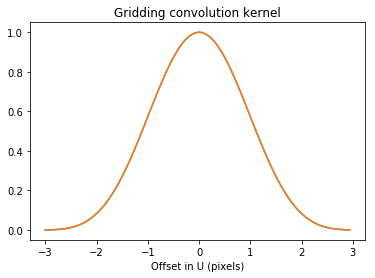

In [3]:
nu = numpy.arange(-support, +support, 1.0/oversampling)
kernel1d  = grdsf(nu/support)[1]


plt.clf();
plt.plot(nu, kernel1d)
plt.xlabel('Offset in U (pixels)')
plt.plot(nu, kernel1d)
plt.title('Gridding convolution kernel')

plt.show()

Use of this convolution function causes decorrection at the edge of the image. This must be corrected 
by multiplying the image by the grid correction function. Note that this is finely tuned to cut off
at the edge of the image. The particular form of spheroidal function used minimises the aliased power
weighted by (1-nu)**2 where nu=1 at the edge of the image.

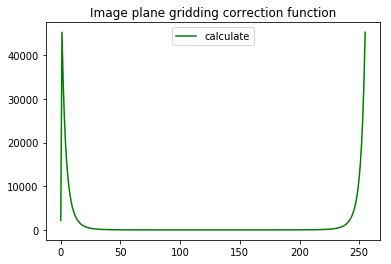

In [4]:
plt.clf()

gc, kc = anti_aliasing_calculate(shape=shape, oversampling=oversampling,
                                   support=3)
plt.plot(range(shape[0]), gc.real[shape[0] // 2, :] **2 , color='g',label='calculate')
plt.legend()
plt.title('Image plane gridding correction function')
plt.show()

Now we will look at how this function is rearranged in 1D to facilitate gridding

Now we assemble the kernels in two dimensions, structured so the last two axes are the fractional offsets.The centering and
coordinate mapping is set to agree with the transform approach.

(16, 16, 8, 8)


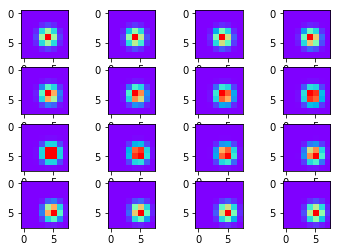

In [5]:
l1d = len(kernel1d)
s1d = 2 * support + 2

kernel4d = numpy.zeros((oversampling, oversampling, s1d, s1d))
for yf in range(oversampling):
    my = range(yf, l1d, oversampling)[::-1]
    for xf in range(oversampling):
        mx = range(xf, l1d, oversampling)[::-1]
        kernel4d[yf, xf, 2:, 2:] = numpy.outer(kernel1d[my], kernel1d[mx])
print(kernel4d.shape)
plt.clf()
for i in range(oversampling):
    plt.subplot(4, oversampling // 4, i+1)
    plt.imshow(kernel4d[i,i].real)

This calculation is performed by anti_aliasing_calculate.

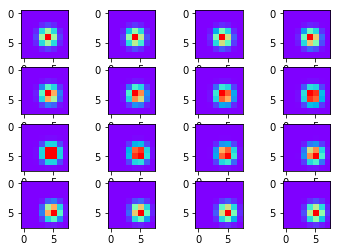

In [6]:
gc, kc = anti_aliasing_calculate(shape=shape, oversampling=oversampling,
                                   support=3)
kc = kc / kc.max()
plt.clf()
for i in range(oversampling):
    plt.subplot(4, oversampling // 4, i+1)
    plt.imshow(numpy.abs(kc[i,i]))